<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr
!pip install yfinance==0.2.59
!pip install ta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.1/533.1 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.66
    Uninstalling yfinance-0.2.66:
      Successfully uninstalled yfinance-0.2.66
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=a867e216b8e264ddebc1a4caf0380925f309557cb122cee9ad0aec02bf772ccf
  Stored in directory: /root/.cache/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta


In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Mounted at /content/drive


Run date time (IST): 2025-12-31 17:19:44
-------------------
qualified stocks: 87
with latest results: 25
still star stocks: 14
-------------------
Initial Investment:  1.30 C
CY Investment:  1.57 C
Reserve:  1.68 K
Current:  1.43 C
-------------------
Today PnL: 1.26 L (0.89%)
Current PnL: -25.96 L (-16.55%)
CY Booked + Current PnL: -11.67 L (-7.44%)
-------------------
Total profit:  1.53 L
Total loss:  -27.49 L
-------------------
Total Booked + Current PnL: 15.31 L (11.8%)
Total Booked PnL: 41.27 L (31.79%)
Curr Year Booked PnL: 14.29 L (9.99%)
Prev Year Booked PnL: 26.98 L (20.78%)
Est FTT:  2.34 C
Est FTT PnL: 91.07 L (63.64%)
Deployed:  1.30 C
Current:  1.43 C
CAGR/XIRR %: 5.39%
Row successfully appended and saved to data/myPortfolioDB.csv.


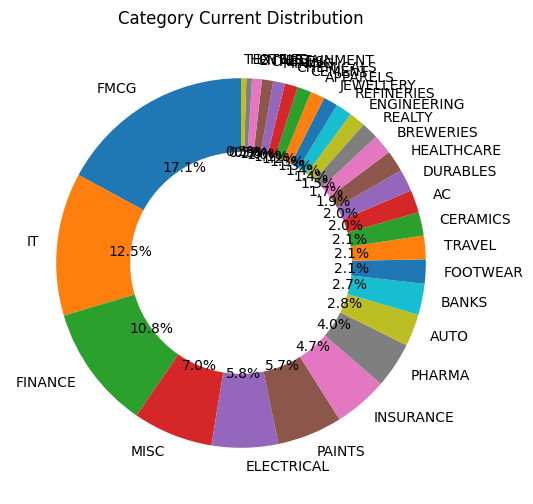

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 1

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'FTT','Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'FTT Amt', 'Current P/L', 'Current', 'Dev%_PE', 'RSI_14','Conviction', 'Spread%',  'CumlRnk', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'Category']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
list_hc = list(tmp_df[tmp_df['Conviction'].isin(['X-LC', 'H-LC', 'X-MC', 'X-SC'])]['Symbol'].values)
list_ox40 = list(tmp_df[tmp_df['MBQ'].str.contains('OX40', na=False)]['Symbol'].values)
list_ox40n = list(tmp_df[tmp_df['MBQ'].str.contains('OX40N', na=False)]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k + list_hc)- set(list_ox40 + list_ox40n))

In [4]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,FTT,Today P/L%,Current P/L%,FTT%,OTT%,FTT Amt,Current P/L,Current,Dev%_PE,RSI_14,Conviction,Spread%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
78,TTKPRESTIG,770.00,0.73,-19.80,24.81,0.09,20051.0,-19957.0,80820.0,87.62,38.0,M-SC,3.18,253.0,-1.00,0.56,6.18,OX40N,NTT,DURABLES
52,NESTLEIND,1377.00,1.09,13.55,6.91,21.40,20826.0,35966.0,301392.0,5.31,66.0,X-LC,5.20,12.0,1.73,2.11,20.73,XY25,NTT,FMCG
50,MASFIN,398.61,2.91,-0.92,23.18,22.05,22503.0,-900.0,97080.0,-14.63,57.0,H-SC,6.61,164.0,-0.04,0.68,41.11,XR,ATH,FINANCE
83,VOLTAS,1530.00,0.78,6.49,12.40,19.69,25318.0,12438.0,204180.0,-3.84,47.0,X-MC,2.13,78.0,0.49,1.43,13.73,XY25,NTT,AC
44,ITC,452.00,0.60,-1.23,12.16,10.78,28864.0,-2951.0,237367.0,-41.15,49.0,X-LC,1.99,5.0,-0.10,1.66,3.94,X40,NTT,FMCG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,ACC,3906.00,0.32,-26.97,124.78,64.15,216830.0,-64181.0,173770.0,-57.19,36.0,X-SC,5.65,82.0,-0.30,1.21,0.72,XY24,BTT,CEMENT
8,AWL,485.00,-1.12,-24.90,104.38,53.50,236548.0,-75129.0,226622.0,-63.63,34.0,X-MC,6.97,58.0,-0.32,1.58,0.66,XY24,NTT,FMCG
61,REPCOHOME,880.00,0.39,-10.52,112.12,89.82,287450.0,-30128.0,256377.0,-55.29,57.0,H-SC,5.40,160.0,-0.10,1.79,35.64,XY24,NTT,FINANCE
11,BANDHANBNK,400.00,0.00,-29.85,174.31,92.42,340600.0,-83160.0,195399.0,37.21,45.0,H-SC,9.97,170.0,-0.24,1.37,12.92,XY24,NTT,BANKS


In [5]:
# High quality (X40 + X40N + X5K + X-LC + H-LC + X-MC + X-SC) stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,FTT,Today P/L%,Current P/L%,FTT%,OTT%,FTT Amt,Current P/L,Current,Dev%_PE,RSI_14,Conviction,Spread%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
2,ABBOTINDIA,35195.00,1.20,-2.63,21.26,18.07,37024.0,-4705.0,174150.0,-16.56,56.0,X-MC,7.61,63.0,-0.13,1.22,15.40,X40,ATH,PHARMA
3,ACC,3906.00,0.32,-26.97,124.78,64.15,216830.0,-64181.0,173770.0,-57.19,36.0,X-SC,5.65,82.0,-0.30,1.21,0.72,XY24,BTT,CEMENT
5,ASIANPAINT,3460.25,0.41,-3.20,24.94,20.95,60783.0,-8052.0,243716.0,-4.15,47.0,X-LC,14.01,31.0,-0.13,1.70,31.30,X40,ATH,PAINTS
8,AWL,485.00,-1.12,-24.90,104.38,53.50,236548.0,-75129.0,226622.0,-63.63,34.0,X-MC,6.97,58.0,-0.32,1.58,0.66,XY24,NTT,FMCG
9,BAJAJHFL,181.50,0.17,-19.20,92.41,55.47,181663.0,-46702.0,196584.0,-28.46,28.0,X-MC,16.46,64.0,-0.26,1.37,0.73,X40N,ATH,FINANCE
10,BAJAJHLDNG,14451.52,3.15,1.29,27.57,29.22,53093.0,2451.0,192576.0,-1.33,50.0,X-LC,12.17,35.0,0.05,1.35,10.59,X40,ATH,FINANCE
12,BATAINDIA,2096.00,0.53,-39.17,122.27,35.20,95700.0,-50401.0,78269.0,2.67,35.0,X-SC,17.36,92.0,-0.53,0.55,0.53,X40,NTT,FOOTWEAR
13,BERGEPAINT,680.00,2.09,-4.41,26.74,21.14,58107.0,-10036.0,217303.0,-11.18,44.0,X-MC,1.62,74.0,-0.17,1.52,20.68,XY24,NTT,PAINTS
16,CAMS,950.00,1.24,-2.92,28.22,24.48,68997.0,-7359.0,244497.0,-81.54,42.0,X-SC,2.62,86.0,-0.11,1.71,19.54,X40N,NTT,MISC
18,COALINDIA,484.83,0.25,-1.88,21.51,19.23,31755.0,-2830.0,147630.0,15.50,66.0,L-LC,3.71,179.0,-0.09,1.03,18.99,XY25,ATH,MINING


In [6]:
# OX40N stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(list_ox40n))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,FTT,Today P/L%,Current P/L%,FTT%,OTT%,FTT Amt,Current P/L,Current,Dev%_PE,RSI_14,Conviction,Spread%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
0,5PAISA,593.00,0.65,-36.44,77.62,12.90,107800.0,-79614.0,138882.0,104.33,57.0,H-SC,12.35,161.0,-0.74,0.97,15.48,OX40N,NTT,FINANCE
17,CERA,9475.00,1.50,-31.54,80.98,23.89,97513.0,-55487.0,120416.0,-33.89,41.0,H-SC,12.81,157.0,-0.57,0.84,4.00,OX40N,NTT,CERAMICS
26,FINCABLES,1641.55,2.45,-5.05,118.96,107.91,166775.0,-7450.0,140194.0,-22.58,46.0,M-SC,11.59,216.0,-0.04,0.98,4.53,OX40N,ATH,CABLES
40,INDIGOPNTS,1408.00,1.90,-18.75,23.10,0.02,32763.0,-32728.0,141831.0,116.52,39.0,M-SC,8.37,234.0,-1.00,0.99,23.37,OX40N,NTT,PAINTS
45,JCHAC,2282.00,0.27,-37.41,59.76,-0.01,47802.0,-47815.0,79990.0,16269.57,36.0,M-SC,13.54,233.0,-1.00,0.56,2.38,OX40N,NTT,AC
48,KANSAINER,340.00,0.68,-21.42,44.40,13.47,94086.0,-57762.0,211905.0,-67.73,54.0,H-SC,6.50,158.0,-0.61,1.48,7.75,XY24,NTT,PAINTS
56,RAJESHEXPO,518.00,-4.38,-64.52,182.07,0.07,88604.0,-88512.0,48665.0,1684.09,42.0,L-SC,4.35,268.0,-1.00,0.34,21.03,OX40N,NTT,JEWELLERY
64,SFL,1287.00,0.99,-42.49,120.17,26.63,181233.0,-111404.0,150814.0,14.18,43.0,M-SC,12.74,239.0,-0.61,1.05,3.25,XY24,NTT,MISC
67,SIS,528.00,-0.06,-23.43,58.37,21.26,49624.0,-26015.0,85017.0,2006.74,52.0,H-SC,4.49,166.0,-0.52,0.59,14.87,OX40N,NTT,MISC
71,SYMPHONY,1306.00,2.14,-32.50,48.10,-0.03,55566.0,-55619.0,115522.0,-45.89,57.0,M-SC,16.14,206.0,-1.00,0.81,4.98,OX40N,NTT,DURABLES


In [7]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,FTT,Today P/L%,Current P/L%,FTT%,OTT%,FTT Amt,Current P/L,Current,Dev%_PE,RSI_14,Conviction,Spread%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
3,ACC,3906.00,0.32,-26.97,124.78,64.15,216830.0,-64181.0,173770.0,-57.19,36.0,X-SC,5.65,82.0,-0.30,1.21,0.72,XY24,BTT,CEMENT
7,ATULAUTO,844.00,1.34,-24.15,91.91,45.57,137435.0,-47600.0,149532.0,3229.73,47.0,M-SC,6.68,244.0,-0.35,1.05,6.01,XY24,NTT,AUTO
8,AWL,485.00,-1.12,-24.90,104.38,53.50,236548.0,-75129.0,226622.0,-63.63,34.0,X-MC,6.97,58.0,-0.32,1.58,0.66,XY24,NTT,FMCG
11,BANDHANBNK,400.00,0.00,-29.85,174.31,92.42,340600.0,-83160.0,195399.0,37.21,45.0,H-SC,9.97,170.0,-0.24,1.37,12.92,XY24,NTT,BANKS
13,BERGEPAINT,680.00,2.09,-4.41,26.74,21.14,58107.0,-10036.0,217303.0,-11.18,44.0,X-MC,1.62,74.0,-0.17,1.52,20.68,XY24,NTT,PAINTS
15,CAMPUS,393.00,0.50,-11.16,50.03,33.28,74570.0,-18725.0,149050.0,-28.49,45.0,M-SC,2.30,222.0,-0.25,1.04,15.52,XY24,NTT,FOOTWEAR
18,COALINDIA,484.83,0.25,-1.88,21.51,19.23,31755.0,-2830.0,147630.0,15.50,66.0,L-LC,3.71,179.0,-0.09,1.03,18.99,XY25,ATH,MINING
20,COLPAL,3726.84,1.09,-21.19,79.55,41.51,165122.0,-55795.0,207570.0,-6.08,38.0,X-MC,8.38,61.0,-0.34,1.45,1.09,XY25,ATH,FMCG
21,DABUR,735.00,1.60,-1.54,45.95,43.70,112231.0,-3822.0,244246.0,-9.61,55.0,X-MC,1.98,72.0,-0.03,1.71,13.28,XY24,BTT,FMCG
25,EASEMYTRIP,26.40,0.41,-59.49,259.67,45.70,185986.0,-105191.0,71624.0,-25.60,39.0,M-SC,23.75,205.0,-0.57,0.50,3.23,XY24,NTT,TRAVEL


In [8]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,FTT,Today P/L%,Current P/L%,FTT%,OTT%,FTT Amt,Current P/L,Current,Dev%_PE,RSI_14,Conviction,Spread%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
1,ABB,7934.00,0.61,-5.14,53.46,45.57,132666.0,-13459.0,248160.0,-39.05,50.0,H-MC,4.60,120.0,-0.10,1.73,5.59,AR,NTT,ELECTRICAL
4,ALKYLAMINE,4546.37,2.46,-32.02,184.84,93.63,126859.0,-32331.0,68632.0,-27.23,40.0,H-SC,15.77,145.0,-0.25,0.48,2.46,SR,ATH,CHEMICALS
6,ASIANTILES,137.00,1.06,-0.03,81.72,81.67,76641.0,-25.0,93785.0,8450.00,67.0,L-SC,16.06,271.0,-0.00,0.66,81.62,XR,NTT,CERAMICS
14,BSOFT,831.70,2.29,-21.44,91.95,50.79,101597.0,-30161.0,110492.0,0.89,55.0,H-SC,11.15,151.0,-0.30,0.77,28.65,XR,ATH,IT
19,COFFEEDAY,80.00,-3.36,-38.77,120.93,35.27,84074.0,-44026.0,69523.0,-53.72,52.0,L-SC,7.06,270.0,-0.52,0.49,70.16,XR,NTT,HOTELS
22,DEN,75.00,0.10,-41.01,140.85,42.07,70177.0,-34640.0,49824.0,76.17,46.0,M-SC,8.11,235.0,-0.49,0.35,5.81,AR,NTT,ENTERTAINMENT
30,HAPPSTMNDS,1480.71,1.38,-42.52,221.61,84.85,163247.0,-54501.0,73664.0,-31.75,33.0,H-SC,13.88,147.0,-0.33,0.51,1.38,AR,ATH,IT
31,HATHWAY,31.40,0.32,-31.40,152.61,73.29,113817.0,-34140.0,74580.0,765.94,43.0,H-SC,10.08,172.0,-0.30,0.52,1.80,XR,NTT,ENTERTAINMENT
38,IEX,219.00,1.67,-8.91,63.16,48.63,115038.0,-17817.0,182137.0,-39.32,38.0,H-SC,14.04,136.0,-0.15,1.27,1.67,XR,NTT,MISC
39,INDIAMART,4810.62,-1.04,-4.45,116.35,106.72,137114.0,-5490.0,117846.0,-52.73,42.0,H-SC,5.85,139.0,-0.04,0.82,17.89,AR,ATH,MISC


In [9]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.94
1,20,36.53
2,30,51.29


In [10]:
# market-cap-wise allocation
df_portfolio_features[cols].groupby(df_portfolio_features['Conviction'].str[-2:])['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
SC,43.31
MC,30.18
LC,26.48


In [11]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,26.47
X40,23.89
X40N,12.64
XY25,10.43
XR,9.62
AR,8.60
OX40N,7.34
SR,0.98


In [12]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
X-MC,23.77
X-LC,23.10
H-SC,22.67
M-SC,11.29
X-SC,7.86
H-MC,4.70
L-SC,1.49
M-MC,1.37
M-LC,1.28


In [13]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
X40       X-LC          11.22
          X-MC          10.37
XY24      H-SC           9.33
XR        H-SC           5.81
X40N      X-MC           5.71
XY24      M-SC           5.41
XY25      X-LC           5.15
XY24      X-MC           4.81
OX40N     M-SC           3.90
X40N      X-LC           3.77
AR        H-SC           3.45
X40N      X-SC           3.16
AR        H-MC           3.14
OX40N     H-SC           3.10
XY24      X-LC           2.96
XY25      X-MC           2.88
XY24      X-SC           2.40
X40       X-SC           2.30
XY24      H-MC           1.56
XY25      M-MC           1.37
XR        M-LC           1.28
          L-SC           1.15
AR        H-LC           1.07
XR        M-SC           1.04
XY25      L-LC           1.03
SR        H-SC           0.98
AR        M-SC           0.94
OX40N     L-SC           0.34
XR        L-MC           0.34
Name: CurrAlloc%, dtype: float64

In [14]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
FMCG,17.10,-6.63,40.91
IT,12.49,-17.57,76.68
FINANCE,10.84,-14.94,63.17
MISC,6.98,-29.72,82.78
ELECTRICAL,5.81,-12.84,54.17
PAINTS,5.69,-13.33,30.16
INSURANCE,4.70,-0.73,35.19
PHARMA,4.01,-2.37,34.59
AUTO,2.83,-29.91,74.95


In [15]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,74.5,10661325.0,-12.81,-1366026.0,51.97,5540948.0


In [16]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,59.82,8561548.0,-7.47,-639474.0,40.42,3460404.0


In [17]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3132998.0
AR,1338957.0
XR,1285221.0
X40,1048761.0
X40N,876862.0
OX40N,740986.0
XY25,401915.0
SR,280928.0


In [18]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,3547783.0
M-SC,1443788.0
X-MC,1424409.0
X-LC,918793.0
X-SC,793704.0
H-MC,405334.0
L-SC,249319.0
M-LC,108928.0
H-LC,80412.0


In [19]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

,,FTT Amt
Criteria,Conviction,
XY24,H-SC,1237576.0
AR,H-SC,916273.0
XY24,M-SC,814733.0
XR,H-SC,783581.0
X40,X-MC,479023.0
XY24,X-MC,406886.0
X40,X-LC,388715.0
X40N,X-MC,348060.0
OX40N,H-SC,329425.0


In [20]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
H-SC,24
X-MC,16
M-SC,15
X-LC,13
X-SC,8
H-MC,3
L-SC,3
L-LC,1
L-MC,1
